# load count data

In [3]:
import sys 
sys.path.append("../../scripts/")
import os 
from cleavage import *
import pandas as pd 
import matplotlib.pyplot as plt 
import subprocess
import seaborn as sns 
import torch

seqid = "generated_seq411"
csv_ref = "../../reference/cleavesite_rna_library_notrunc_cyk.csv"
samfiles = [f"../../outputs/220822/bwa/{i}_S{i}_L001_merged.assembled.sam" for i in range(1, 19)]
samfiles

['../../outputs/220822/bwa/1_S1_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/2_S2_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/3_S3_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/4_S4_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/5_S5_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/6_S6_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/7_S7_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/8_S8_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/9_S9_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/10_S10_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/11_S11_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/12_S12_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/13_S13_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/14_S14_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/15_S15_L001_merged.assembled.sam',
 '../../outputs/220822/bwa/16_S16_L001_merged.assembled.sam',
 '../../outputs/220822/bwa

In [4]:
# dict_rcleaved = dict()
# dict_depth = dict()
# dict_cleave = dict()
# dict_uncleave = dict()

# for samfile in samfiles:
#     fname, _ = os.path.splitext(samfile)
#     id_sample = fname.split("_")[1]
#     pos, readlen = get_cleaved_5site(samfile)
#     depth, cleave, uncleave, rcleaved = calc_cleave_rate(csv_ref, pos)
#     dict_depth[id_sample] = depth
#     dict_cleave[id_sample] = cleave
#     dict_uncleave[id_sample] = uncleave
#     dict_rcleaved[id_sample] = rcleaved
    
# df_rcleaved = pd.DataFrame(dict_rcleaved) #.dropna()
# df_depth = pd.DataFrame(dict_depth) #.dropna()
# df_cleave = pd.DataFrame(dict_cleave) #.dropna()
# df_uncleave = pd.DataFrame(dict_uncleave) #.dropna()

# df_rcleaved.to_csv("../../outputs/220822/rate_cleaved.csv")
# df_depth.to_csv("../../outputs/220822/depth.csv")
# df_cleave.to_csv("../../outputs/220822/cleave.csv")
# df_uncleave.to_csv("../../outputs/220822/uncleave.csv")

df_rcleaved = pd.read_csv("../../outputs/220822/rate_cleaved.csv", index_col = 0)
df_depth = pd.read_csv("../../outputs/220822/depth.csv", index_col = 0)
df_cleave = pd.read_csv("../../outputs/220822/cleave.csv", index_col = 0)
df_uncleave = pd.read_csv("../../outputs/220822/uncleave.csv", index_col = 0)
df_rcleaved.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
JOTN01000018.1/8921-9077_wild_15,0.008539,0.018846,0.047350,0.023529,0.081690,0.104302,0.190808,0.237209,0.001905,0.000000,0.016913,0.038636,0.045226,0.117155,0.209581,0.326340,0.037718,0.057471
FR903934.1/5471-5622,0.000000,0.000000,0.111111,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
FR902178.1/2072-1922,0.005882,0.046875,0.056218,0.000000,0.228070,0.295775,0.547445,0.810000,0.006173,0.000000,0.040816,0.154545,0.265306,0.303571,0.706522,0.730337,0.094675,0.134328
GG668534.1/280157-280311,0.170979,0.760595,0.913768,0.954128,0.943955,0.936000,0.945809,0.937279,0.147196,0.086207,0.884525,0.929705,0.927644,0.924086,0.937284,0.948851,0.896094,0.894923
FR883402.1/112823-112697,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000


In [5]:
print("Cleaved depth, ", df_cleave.loc[seqid]["S6"])
print("Uncleaved depth, ", df_uncleave.loc[seqid]["S6"])
print("Cleaved rate, ", df_rcleaved.loc[seqid]["S6"])


Cleaved depth,  96
Uncleaved depth,  2
Cleaved rate,  0.979591836734694


In [6]:
timestamps = [0,1,3, 5,10,30,60]
# sample_names = ["S2", "S3", "S17", "S5", "S6", "S7", "S8"]
sample_names = ["S10", "S11", "S12", "S13", "S14", "S15", "S16"]

In [9]:
def get_xydata(seqid):
    xy_data = []
    for i, sample_name in enumerate(df_cleave[sample_names].loc[seqid].index):
         
        # add cleaved
        for j in range(df_cleave[sample_names].loc[seqid][sample_name]):
            xy_data.append([timestamps[i], 1])
        # add uncleaved
        for j in range(df_uncleave[sample_names].loc[seqid][sample_name]):
            xy_data.append([timestamps[i], 0])
            
    
    return pd.DataFrame(xy_data, columns = ["Time[min]", "Cleaved"])


df_data = get_xydata(seqid)
df_data

,Time[min],Cleaved
0,0,1
1,0,1
2,0,1
3,0,1
4,0,0
...,...,...
642,60,1
643,60,1
644,60,0
645,60,0


# bayesian regression

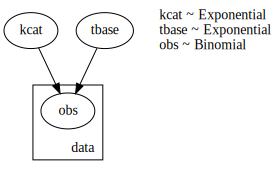

In [10]:
from pyro.nn import PyroSample
from pyro.nn import PyroModule
import os
from functools import partial
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyro
import pyro.distributions as dist


class BayesianKinetics(PyroModule):
    def __init__(self):
        super().__init__()
        self.kcat = PyroSample(dist.Exponential(0.1))
        self.tbase = PyroSample(dist.Exponential(1))
        
    def forward(self, x, y = None):
        mean = (1- torch.exp(- self.kcat * (x+self.tbase))).squeeze(-1)
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs",dist.Binomial(total_count = 1, probs = mean), obs = y)
            return mean

        
def get_xydata(seqid):
    xy_data = []
    for i, sample_name in enumerate(df_cleave[sample_names].loc[seqid].index):
         
        # add cleaved
        for j in range(df_cleave[sample_names].loc[seqid][sample_name]):
            xy_data.append([timestamps[i], 1])
        # add uncleaved
        for j in range(df_uncleave[sample_names].loc[seqid][sample_name]):
            xy_data.append([timestamps[i], 0])

    return pd.DataFrame(xy_data, columns = ["Time[min]", "Cleaved"])


        
# seqid = df_rcleaved.index[2]
# seqid = "seqid-12229_logkcat--13.3208_tau-609756.0976_binid-1"
seqid = "KI273145.1/114914-115084"
df_data = get_xydata(seqid)
data = torch.tensor(df_data.values, dtype = torch.float)
x_data, y_data = data[:, 0], data[:, 1]
x_data.shape        


bk =BayesianKinetics()

pyro.render_model(bk, model_args=(x_data,), render_params = True, render_distributions = True)

In [107]:
# from torch.distributions import Binomial
# p_mean = torch.rand([100])
# print(p_mean.shape)
# m = Binomial(total_count = 1, probs = p_mean)
# m.sample()

In [108]:
from pyro.infer.autoguide import AutoDiagonalNormal, AutoMultivariateNormal

model = BayesianKinetics()
guide = AutoDiagonalNormal(model)


In [109]:
from pyro.infer import SVI, Trace_ELBO


adam = pyro.optim.Adam({"lr": 0.03})
svi = SVI(model, guide, adam, loss=Trace_ELBO())


In [110]:

pyro.clear_param_store()

smoke_test = ('CI' in os.environ)
assert pyro.__version__.startswith('1.8.1')
pyro.set_rng_seed(1)

num_iterations = 5000 if not smoke_test else 2


for j in range(num_iterations):
    # calculate the loss and take a gradient step
    loss = svi.step(x_data, y_data)
    if j % 100 == 0:
        print("[iteration %04d] loss: %.4f" % (j + 1, loss / len(data)))


[iteration 0001] loss: 0.6978
[iteration 0101] loss: 0.2335
[iteration 0201] loss: 0.2405
[iteration 0301] loss: 0.2392
[iteration 0401] loss: 0.2403
[iteration 0501] loss: 0.2360
[iteration 0601] loss: 0.2390
[iteration 0701] loss: 0.2363
[iteration 0801] loss: 0.2366
[iteration 0901] loss: 0.2358
[iteration 1001] loss: 0.2373
[iteration 1101] loss: 0.2372
[iteration 1201] loss: 0.2380
[iteration 1301] loss: 0.2378
[iteration 1401] loss: 0.2381
[iteration 1501] loss: 0.2385
[iteration 1601] loss: 0.2360
[iteration 1701] loss: 0.2551
[iteration 1801] loss: 0.2414
[iteration 1901] loss: 0.2373
[iteration 2001] loss: 0.2372
[iteration 2101] loss: 0.2365
[iteration 2201] loss: 0.2349
[iteration 2301] loss: 0.2377
[iteration 2401] loss: 0.2374
[iteration 2501] loss: 0.2368
[iteration 2601] loss: 0.2389
[iteration 2701] loss: 0.2362
[iteration 2801] loss: 0.2367
[iteration 2901] loss: 0.2373
[iteration 3001] loss: 0.2371
[iteration 3101] loss: 0.2403
[iteration 3201] loss: 0.2283
[iteration

In [91]:
guide.requires_grad_(False)

for name, value in pyro.get_param_store().items():
    print(name, pyro.param(name))

    
guide.quantiles([0.25, 0.5, 0.75])


AutoDiagonalNormal.loc Parameter containing:
tensor([-0.0302, -0.9104])
AutoDiagonalNormal.scale tensor([0.0998, 0.2973])


{'kcat': tensor([0.9071, 0.9702, 1.0378]),
 'tbase': tensor([0.3293, 0.4024, 0.4917])}

In [111]:
from pyro.infer import Predictive

def summary(samples):
    site_stats = {}
    for k, v in samples.items():
        site_stats[k] = {
            "mean": torch.mean(v, 0),
            "std": torch.std(v, 0),
            "5%": v.kthvalue(int(len(v) * 0.05), dim=0)[0],
            "95%": v.kthvalue(int(len(v) * 0.95), dim=0)[0],
        }
    return site_stats


predictive = Predictive(model, guide=guide, num_samples=1000,
                        return_sites=("kcat", "tbase", "_RETURN"))
samples = predictive(x_data)
pred_summary = summary(samples)
pred_summary;

In [112]:
df_summary = pd.DataFrame(pred_summary["_RETURN"])
df_summary["Time[min]"] = df_data["Time[min]"]
df_summary = df_summary.groupby("Time[min]").mean()
df_summary

,mean,std,5%,95%
Time[min],,,,
0,0.331224,0.083538,0.203746,0.481690
1,0.746502,0.044494,0.673501,0.818758
3,0.962598,0.012802,0.939464,0.980650
5,0.994288,0.003062,0.988698,0.997904
10,0.999940,0.000067,0.999817,0.999993
30,1.000000,0.000000,1.000000,1.000000
60,1.000000,0.000000,1.000000,1.000000


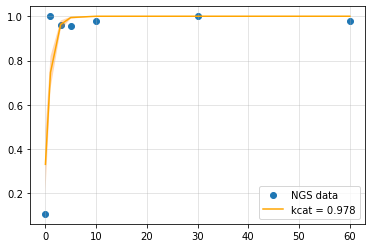

In [115]:
fit = df_data.copy()
res = fit.groupby("Time[min]").mean()
kcat_mean = float(pred_summary["kcat"]["mean"])
# plt.plot(res.index, res["mean"])
plt.scatter(res.index, res["Cleaved"], label = "NGS data")
plt.plot(res.index,
         df_summary["mean"],
         label = f"kcat = {round(kcat_mean, 3)}", color = "orange"
        )
plt.fill_between(res.index, df_summary["95%"], df_summary["5%"], alpha= 0.3)

plt.grid(alpha = 0.4)
plt.legend()

# def func: seqid -> kcat dist.

In [7]:
from pyro.nn import PyroSample
from pyro.nn import PyroModule
import os
from functools import partial
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyro
import pyro.distributions as dist
from pyro.infer.autoguide import AutoDiagonalNormal, AutoMultivariateNormal
from pyro.infer import SVI, Trace_ELBO
from pyro.infer import Predictive


timestamps = [0,1,3, 5,10,30,60]
sample_names = ["S2", "S3", "S17", "S5", "S6", "S7", "S8"]

def get_xydata(seqid):
    xy_data = []
    for i, sample_name in enumerate(df_cleave[sample_names].loc[seqid].index):

        # add cleaved
        for j in range(df_cleave[sample_names].loc[seqid][sample_name]):
            xy_data.append([timestamps[i], 1])
        # add uncleaved
        for j in range(df_uncleave[sample_names].loc[seqid][sample_name]):
            xy_data.append([timestamps[i], 0])


    return pd.DataFrame(xy_data, columns = ["Time[min]", "Cleaved"])


class BayesianKinetics(PyroModule):
    def __init__(self):
        super().__init__()
        self.kcat = PyroSample(dist.Exponential(0.1))
        # self.Rmax = PyroSample(dist.Uniform(0,1))
        self.tbase = PyroSample(dist.Exponential(1))

    def forward(self, x, y = None):
        mean = (1- torch.exp(- self.kcat * (x+self.tbase))).squeeze(-1)
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs",dist.Binomial(total_count = 1, probs = mean), obs = y)
            return mean
        
        
def summary(samples):
    site_stats = {}
    for k, v in samples.items():
        site_stats[k] = {
            "mean": torch.mean(v, 0),
            "std": torch.std(v, 0),
            "5%": v.kthvalue(int(len(v) * 0.05), dim=0)[0],
            "95%": v.kthvalue(int(len(v) * 0.95), dim=0)[0],
        }
    return site_stats


def calc_kcat_bayes(seqid):

    df_data = get_xydata(seqid)
    data = torch.tensor(df_data.values, dtype = torch.float)
    x_data, y_data = data[:, 0], data[:, 1]

    model = BayesianKinetics()
    guide = AutoDiagonalNormal(model)
    adam = pyro.optim.Adam({"lr": 0.03})
    svi = SVI(model, guide, adam, loss=Trace_ELBO())
    
    pyro.clear_param_store()
    n_steps = 5000
    for j in range(n_steps):
        # calculate the loss and take a gradient step
        loss = svi.step(x_data, y_data)
        if j % 4500 == 0:
            print("[iteration %04d] loss: %.4f" % (j + 1, loss / len(data)))

    guide.requires_grad_(False)
    
    predictive = Predictive(model, guide=guide, num_samples=1000,
                            return_sites=("kcat","Rmax", "tbase", "_RETURN"))
    samples = predictive(x_data)
    pred_summary = summary(samples)
    
    return samples, pred_summary



samples, info = calc_kcat_bayes(df_rcleaved.index[6])

[iteration 0001] loss: 4.7965
[iteration 4501] loss: 0.6485


In [8]:
df_rcleaved

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
JOTN01000018.1/8921-9077_wild_15,0.008539,0.018846,0.047350,0.023529,0.081690,0.104302,0.190808,0.237209,0.001905,0.000000,0.016913,0.038636,0.045226,0.117155,0.209581,0.326340,0.037718,0.057471
FR903934.1/5471-5622,0.000000,0.000000,0.111111,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
FR902178.1/2072-1922,0.005882,0.046875,0.056218,0.000000,0.228070,0.295775,0.547445,0.810000,0.006173,0.000000,0.040816,0.154545,0.265306,0.303571,0.706522,0.730337,0.094675,0.134328
GG668534.1/280157-280311,0.170979,0.760595,0.913768,0.954128,0.943955,0.936000,0.945809,0.937279,0.147196,0.086207,0.884525,0.929705,0.927644,0.924086,0.937284,0.948851,0.896094,0.894923
FR883402.1/112823-112697,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seqid-16228_logkcat--3.0055_tau-20.1958_binid-10,0.011146,0.011986,0.027849,0.048780,0.051887,0.070393,0.196035,0.282828,0.000000,0.000000,0.047478,0.058824,0.071713,0.115152,0.359060,0.472924,0.085066,0.119835
seqid-13265_logkcat--3.0558_tau-21.2392_binid-10,0.002869,0.030142,0.040786,0.032258,0.110048,0.116998,0.277186,0.447028,0.005115,0.000000,0.023392,0.083032,0.070093,0.261745,0.344937,0.539062,0.036876,0.095436
seqid-17578_logkcat--2.985_tau-19.7873_binid-10,0.002460,0.016058,0.026453,0.000000,0.071721,0.049743,0.171134,0.283843,0.000000,0.003040,0.024242,0.035587,0.042735,0.110497,0.238095,0.366038,0.019493,0.059441
seqid-5069_logkcat--2.1661_tau-8.724_binid-10,0.008743,0.018678,0.041210,0.050000,0.143369,0.224109,0.389507,0.498162,0.000000,0.002703,0.068602,0.175793,0.204301,0.400943,0.666667,0.668588,0.138889,0.232687


[iteration 0001] loss: 11.1325
[iteration 4501] loss: 0.2575


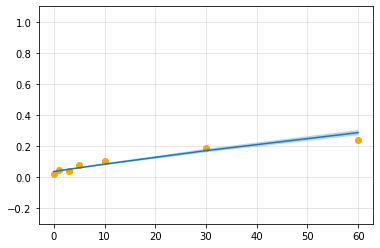

In [9]:
seq_index = 0

samples, info = calc_kcat_bayes(df_rcleaved.index[seq_index])

res = get_xydata(df_rcleaved.index[seq_index]).copy()
infer = pd.DataFrame(info["_RETURN"]) 
infer["Time[min]"]  = res["Time[min]"]
infer= infer.groupby("Time[min]").mean()
res = res.groupby("Time[min]").mean()

plt.scatter(res.index, res["Cleaved"], color = "orange")
plt.plot(infer.index, infer["mean"])
plt.fill_between(infer.index, infer["95%"], infer["5%"], alpha= 0.3)
plt.ylim(-0.3, 1.1)
plt.grid(alpha = 0.4)

In [10]:
dict_info_1st = dict()

for seqid in df_rcleaved.index:
    try:
        print(seqid)
        _, info = calc_kcat_bayes(seqid);
        log_dict = dict()
        for k,v in info.items():
            for vk, vv in v.items():
                log_dict[k+"_"+vk] = vv.numpy()[0]
        dict_info_1st[seqid] = log_dict
    
    except:
        print(f"Error seq: {seqid}")

JOTN01000018.1/8921-9077_wild_15
[iteration 0001] loss: 8.2389
[iteration 4501] loss: 0.2584
FR903934.1/5471-5622
[iteration 0001] loss: 14.2496
[iteration 4501] loss: 0.5062
FR902178.1/2072-1922
[iteration 0001] loss: 7.5961
[iteration 4501] loss: 0.3682
GG668534.1/280157-280311
[iteration 0001] loss: 1.2507
[iteration 4501] loss: 0.3158
FR883402.1/112823-112697
[iteration 0001] loss: 7.7410
[iteration 4501] loss: 0.7640
BAUT01000048.1/6089-6247
[iteration 0001] loss: 11.2615
[iteration 4501] loss: 0.2980
LRVM01000018.1/9408-9566
[iteration 0001] loss: 3.6963
[iteration 4501] loss: 0.6480
FR891245.1/6154-6307
[iteration 0001] loss: 0.8417
[iteration 4501] loss: 0.2855
LGGA01000028.1/5750-5573
[iteration 0001] loss: 0.9226
[iteration 4501] loss: 0.3271
HF993644.1/51944-52093
[iteration 0001] loss: 4.7017
[iteration 4501] loss: 0.6365
CP013217.1/74832-75002
[iteration 0001] loss: 3.3632
[iteration 4501] loss: 0.5753
AE016830.1/2055460-2055313
[iteration 0001] loss: 11.3416
[iteration 45

[iteration 4501] loss: 0.6250
CP013476.1/1416911-1417071
[iteration 0001] loss: 2.6469
[iteration 4501] loss: 0.5354
FRCP01000007.1/100226-100389
[iteration 0001] loss: 11.9118
[iteration 4501] loss: 0.4037
LJJB01000015.1/307707-307537
[iteration 0001] loss: 10.5467
[iteration 4501] loss: 0.4064
KK036471.1/12618-12769
[iteration 0001] loss: 12.2632
[iteration 4501] loss: 0.0580
KB946293.1/815268-815121
[iteration 0001] loss: 6.3228
[iteration 4501] loss: 0.4833
CM000733.1/138271-138426
[iteration 0001] loss: 10.6239
[iteration 4501] loss: 0.5938
DS544193.1/167179-167332
[iteration 0001] loss: 12.9565
[iteration 4501] loss: 0.2344
FR884524.1/6426-6580
[iteration 0001] loss: 0.4745
[iteration 4501] loss: 0.1849
MSZX01000018.1/9414-9592
[iteration 0001] loss: 9.3120
[iteration 4501] loss: 0.2069
LIUR01000001.1/2867186-2867016
[iteration 0001] loss: 0.5724
[iteration 4501] loss: 0.2126
LGGM01000041.1/3335-3169
[iteration 0001] loss: 2.7505
[iteration 4501] loss: 0.5315
LDXQ01000045.1/6263-

[iteration 4501] loss: 0.6202
FP565809.1/589201-589355
[iteration 0001] loss: 1.5074
[iteration 4501] loss: 0.4171
LMSP01000001.1/1108622-1108432
[iteration 0001] loss: 2.2778
[iteration 4501] loss: 0.5899
CP022437.1/118667-118492
[iteration 0001] loss: 3.5098
[iteration 4501] loss: 0.6167
AVPE01000014.1/7645-7816
[iteration 0001] loss: 5.6981
[iteration 4501] loss: 0.6960
FP929046.1/2805761-2805924
[iteration 0001] loss: 11.2646
[iteration 4501] loss: 0.3032
CP017269.1/4003558-4003727
[iteration 0001] loss: 0.8366
[iteration 4501] loss: 0.3343
JPUW01000041.1/17763-17604
[iteration 0001] loss: 6.9825
[iteration 4501] loss: 0.7073
MSDU01000050.1/2905-2737
[iteration 0001] loss: 2.7127
[iteration 4501] loss: 0.8619
CP002582.1/2249026-2249188
[iteration 0001] loss: 1.2360
[iteration 4501] loss: 0.3363
AFNU02000013.1/48765-48609
[iteration 0001] loss: 5.7718
[iteration 4501] loss: 0.6595
CYZX01000011.1/96755-96903
[iteration 0001] loss: 6.3670
[iteration 4501] loss: 0.7640
CP002160.1/44530

[iteration 4501] loss: 0.4578
FQVW01000003.1/85857-85686
[iteration 0001] loss: 8.9453
[iteration 4501] loss: 0.2966
MIEK01000034.1/17427-17280
[iteration 0001] loss: 6.3113
[iteration 4501] loss: 0.6433
FQUW01000011.1/10279-10094
[iteration 0001] loss: 1.6639
[iteration 4501] loss: 0.3968
CP001034.1/253764-253942
[iteration 0001] loss: 7.2438
[iteration 4501] loss: 0.6706
CP000922.1/156745-156916
[iteration 0001] loss: 5.4401
[iteration 4501] loss: 0.7403
FQTU01000008.1/36117-35958
[iteration 0001] loss: 1.0626
[iteration 4501] loss: 0.3211
LQYT01000002.1/38709-38883
[iteration 0001] loss: 10.9281
[iteration 4501] loss: 0.4678
BA000043.1/166978-167149
[iteration 0001] loss: 9.0843
[iteration 4501] loss: 0.2273
CP001617.1/730337-730488
[iteration 0001] loss: 12.1532
[iteration 4501] loss: 0.0590
FR899492.1/8123-7974
[iteration 0001] loss: 3.7729
[iteration 4501] loss: 0.5776
CP002273.2/453707-453857
[iteration 0001] loss: 1.7615
[iteration 4501] loss: 0.4184
LOER01000004.1/113359-11351

[iteration 4501] loss: 0.0710
MGBG01000022.1/18572-18740
[iteration 0001] loss: 2.4074
[iteration 4501] loss: 0.6504
ALPT02000103.1/9713-9883
[iteration 0001] loss: 6.4519
[iteration 4501] loss: 0.7325
KE150423.1/19757-19930
[iteration 0001] loss: 4.0900
[iteration 4501] loss: 0.5871
CP019699.1/195596-195760
[iteration 0001] loss: 1.2864
[iteration 4501] loss: 0.4723
FR891123.1/17403-17248
[iteration 0001] loss: 12.6660
[iteration 4501] loss: 0.3220
CP002770.1/2876436-2876252
[iteration 0001] loss: 1.1773
[iteration 4501] loss: 0.4394
CP019433.1/1566098-1565941
[iteration 0001] loss: 12.2524
[iteration 4501] loss: 0.3262
LM997412.1/809345-809488
[iteration 0001] loss: 3.1246
[iteration 4501] loss: 0.5340
MBTG01000057.1/8907-9097
[iteration 0001] loss: 5.9380
[iteration 4501] loss: 0.6130
CCDI010000005.1/16154-16323
[iteration 0001] loss: 11.2102
[iteration 4501] loss: 0.5443
CP001859.1/1063237-1063391
[iteration 0001] loss: 11.8942
[iteration 4501] loss: 0.6207
CP000860.1/387919-388097

FPAA01000010.1/9691-9849
[iteration 0001] loss: 2.2631
[iteration 4501] loss: 0.5195
JPVP01000052.1/195237-195064
[iteration 0001] loss: 8.9263
[iteration 4501] loss: 0.5941
CCXS01000001.1/3280075-3279899
[iteration 0001] loss: 1.4767
[iteration 4501] loss: 0.3928
MENB01000003.1/4420-4604
[iteration 0001] loss: 5.5565
[iteration 4501] loss: 0.4622
MNJJ01000247.1/1502-1334
[iteration 0001] loss: 8.4502
[iteration 4501] loss: 0.3849
KE159710.1/175292-175126
[iteration 0001] loss: 7.5126
[iteration 4501] loss: 0.6574
MELR01000025.1/3905-4059
[iteration 0001] loss: 10.4330
[iteration 4501] loss: 0.6195
FXWM01000001.1/342349-342514
[iteration 0001] loss: 1.7308
[iteration 4501] loss: 0.6347
JYNH01000142.1/11141-11303
[iteration 0001] loss: 0.4034
[iteration 4501] loss: 0.2144
CP001818.1/874538-874691
[iteration 0001] loss: 8.2005
[iteration 4501] loss: 0.3854
CP001098.1/161628-161798
[iteration 0001] loss: 0.2607
[iteration 4501] loss: 0.1275
MGWF01000036.1/21378-21245
[iteration 0001] loss

[iteration 4501] loss: 0.5147
LAYY01000035.1/16790-16627
[iteration 0001] loss: 5.6853
[iteration 4501] loss: 0.6374
AOCG01000002.1/123032-122838
[iteration 0001] loss: 8.9136
[iteration 4501] loss: 0.5606
MRAE01000005.1/55771-55928
[iteration 0001] loss: 13.5010
[iteration 4501] loss: 0.0858
FR887202.1/2098-1929
[iteration 0001] loss: 10.4754
[iteration 4501] loss: 0.3063
CCXR01000001.1/70782-70952
[iteration 0001] loss: 3.3297
[iteration 4501] loss: 0.6424
CYYL01000003.1/67837-67672
[iteration 0001] loss: 10.0778
[iteration 4501] loss: 0.0527
JSCE01000047.1/815-971
[iteration 0001] loss: 11.2963
[iteration 4501] loss: 0.4316
LSGP01000008.1/39767-39919
[iteration 0001] loss: 2.4439
[iteration 4501] loss: 0.5801
LKEU01000012.1/60545-60697
[iteration 0001] loss: 1.1246
[iteration 4501] loss: 0.3568
NGLL01000001.1/1613397-1613254
[iteration 0001] loss: 10.6011
[iteration 4501] loss: 0.5221
FR899721.1/7096-6943
[iteration 0001] loss: 14.8578
[iteration 4501] loss: 0.0416
KI629786.1/126205

LHOX01000017.1/101596-101739
[iteration 0001] loss: 11.8981
[iteration 4501] loss: 0.5070
AZQP01000060.1/4424-4277
[iteration 0001] loss: 1.8162
[iteration 4501] loss: 0.4477
FXBB01000034.1/2525-2368
[iteration 0001] loss: 2.8592
[iteration 4501] loss: 0.5133
AMPQ01000015.1/8680-8854
[iteration 0001] loss: 1.9861
[iteration 4501] loss: 0.5067
CP022657.1/508919-509087
[iteration 0001] loss: 11.0802
[iteration 4501] loss: 0.3810
KQ758624.1/9142-9308
[iteration 0001] loss: 0.5005
[iteration 4501] loss: 0.2267
LGFL01000045.1/9604-9765
[iteration 0001] loss: 1.7898
[iteration 4501] loss: 0.4898
MJEH01000024.1/36728-36561
[iteration 0001] loss: 0.7212
[iteration 4501] loss: 0.4352
FP929038.1/1461779-1461629
[iteration 0001] loss: 1.4984
[iteration 4501] loss: 0.3704
FUZT01000001.1/63578-63748
[iteration 0001] loss: 3.0655
[iteration 4501] loss: 0.4580
MNTA01000183.1/9379-9224
[iteration 0001] loss: 10.1320
[iteration 4501] loss: 0.3421
LMSD01000017.1/51545-51352
[iteration 0001] loss: 6.4377

[iteration 4501] loss: 0.1385
generated_seq0
[iteration 0001] loss: 1.4949
[iteration 4501] loss: 0.4377
generated_seq1
[iteration 0001] loss: 1.6980
[iteration 4501] loss: 0.3778
generated_seq2
[iteration 0001] loss: 0.7916
[iteration 4501] loss: 0.2929
generated_seq3
[iteration 0001] loss: 13.1990
[iteration 4501] loss: 0.4183
generated_seq4
[iteration 0001] loss: 1.1664
[iteration 4501] loss: 0.3382
generated_seq5
[iteration 0001] loss: 1.1189
[iteration 4501] loss: 0.4234
generated_seq6
[iteration 0001] loss: 11.5673
[iteration 4501] loss: 0.1375
generated_seq7
[iteration 0001] loss: 9.4596
[iteration 4501] loss: 0.4151
generated_seq8
[iteration 0001] loss: 1.4941
[iteration 4501] loss: 0.5455
generated_seq9
[iteration 0001] loss: 9.6312
[iteration 4501] loss: 0.3490
generated_seq10
[iteration 0001] loss: 3.3467
[iteration 4501] loss: 0.6784
generated_seq11
[iteration 0001] loss: 0.5755
[iteration 4501] loss: 0.2621
generated_seq12
[iteration 0001] loss: 2.5474
[iteration 4501] los

[iteration 4501] loss: 0.2591
generated_seq108
[iteration 0001] loss: 4.1303
[iteration 4501] loss: 0.6911
generated_seq109
[iteration 0001] loss: 1.0441
[iteration 4501] loss: 0.3344
generated_seq110
[iteration 0001] loss: 1.5010
[iteration 4501] loss: 0.4271
generated_seq111
[iteration 0001] loss: 11.1620
[iteration 4501] loss: 0.2435
generated_seq112
[iteration 0001] loss: 0.3810
[iteration 4501] loss: 0.2664
generated_seq113
[iteration 0001] loss: 6.3919
[iteration 4501] loss: 0.5621
generated_seq114
[iteration 0001] loss: 1.0164
[iteration 4501] loss: 0.3432
generated_seq115
[iteration 0001] loss: 3.6025
[iteration 4501] loss: 0.8331
generated_seq116
[iteration 0001] loss: 0.7245
[iteration 4501] loss: 0.3964
generated_seq117
[iteration 0001] loss: 4.7889
[iteration 4501] loss: 0.5534
generated_seq118
[iteration 0001] loss: 1.1967
[iteration 4501] loss: 0.4872
generated_seq119
[iteration 0001] loss: 2.7367
[iteration 4501] loss: 0.8361
generated_seq120
[iteration 0001] loss: 4.418

generated_seq214
[iteration 0001] loss: 5.4974
[iteration 4501] loss: 0.5338
generated_seq215
[iteration 0001] loss: 8.1774
[iteration 4501] loss: 0.9797
generated_seq216
[iteration 0001] loss: 12.1571
[iteration 4501] loss: 0.3073
generated_seq217
[iteration 0001] loss: 0.6969
[iteration 4501] loss: 0.2788
generated_seq218
[iteration 0001] loss: 0.1718
[iteration 4501] loss: 0.1358
generated_seq219
[iteration 0001] loss: 1.1556
[iteration 4501] loss: 0.4062
generated_seq220
[iteration 0001] loss: 2.3602
[iteration 4501] loss: 0.5442
generated_seq221
[iteration 0001] loss: 1.6426
[iteration 4501] loss: 0.4090
generated_seq222
[iteration 0001] loss: 13.6749
[iteration 4501] loss: 0.2428
generated_seq223
[iteration 0001] loss: 10.4873
[iteration 4501] loss: 0.6359
generated_seq224
[iteration 0001] loss: 2.6183
[iteration 4501] loss: 0.6485
generated_seq225
[iteration 0001] loss: 4.8613
[iteration 4501] loss: 0.6752
generated_seq226
[iteration 0001] loss: 0.6622
[iteration 4501] loss: 0.2

[iteration 4501] loss: 0.2238
generated_seq321
[iteration 0001] loss: 2.6084
[iteration 4501] loss: 0.6231
generated_seq322
[iteration 0001] loss: 5.2702
[iteration 4501] loss: 0.8231
generated_seq323
[iteration 0001] loss: 2.6588
[iteration 4501] loss: 0.6256
generated_seq324
[iteration 0001] loss: 4.8754
[iteration 4501] loss: 0.7096
generated_seq325
[iteration 0001] loss: 0.4861
[iteration 4501] loss: 0.2206
generated_seq326
[iteration 0001] loss: 10.4788
[iteration 4501] loss: 1.1841
generated_seq327
[iteration 0001] loss: 2.4721
[iteration 4501] loss: 0.4669
generated_seq328
[iteration 0001] loss: 6.2055
[iteration 4501] loss: 0.7222
generated_seq329
[iteration 0001] loss: 1.9420
[iteration 4501] loss: 0.4149
generated_seq330
[iteration 0001] loss: 1.1525
[iteration 4501] loss: 0.3604
generated_seq331
[iteration 0001] loss: 2.3605
[iteration 4501] loss: 0.4698
generated_seq332
[iteration 0001] loss: 0.7675
[iteration 4501] loss: 0.2912
generated_seq333
[iteration 0001] loss: 9.579

generated_seq427
[iteration 0001] loss: 2.1777
[iteration 4501] loss: 0.5095
generated_seq428
[iteration 0001] loss: 8.9555
[iteration 4501] loss: 0.7910
generated_seq429
[iteration 0001] loss: 0.3901
[iteration 4501] loss: 0.2006
generated_seq430
[iteration 0001] loss: 2.5420
[iteration 4501] loss: 1.0695
generated_seq431
[iteration 0001] loss: 10.4634
[iteration 4501] loss: 0.4600
generated_seq432
[iteration 0001] loss: 1.0195
[iteration 4501] loss: 0.3670
generated_seq433
[iteration 0001] loss: 0.3920
[iteration 4501] loss: 0.1757
generated_seq434
[iteration 0001] loss: 11.5174
[iteration 4501] loss: 0.3760
generated_seq435
[iteration 0001] loss: 11.3702
[iteration 4501] loss: 0.3497
generated_seq436
[iteration 0001] loss: 7.1135
[iteration 4501] loss: 0.8174
generated_seq437
[iteration 0001] loss: 0.8643
[iteration 4501] loss: 0.3671
generated_seq438
[iteration 0001] loss: 0.4069
[iteration 4501] loss: 0.1866
generated_seq439
[iteration 0001] loss: 1.6288
[iteration 4501] loss: 0.4

[iteration 4501] loss: 0.3873
generated_seq534
[iteration 0001] loss: 7.7158
[iteration 4501] loss: 0.4995
generated_seq535
[iteration 0001] loss: 13.1909
[iteration 4501] loss: 0.2060
generated_seq536
[iteration 0001] loss: 2.1584
[iteration 4501] loss: 0.4633
generated_seq537
[iteration 0001] loss: 0.7426
[iteration 4501] loss: 0.2540
generated_seq538
[iteration 0001] loss: 1.4496
[iteration 4501] loss: 0.5415
generated_seq539
[iteration 0001] loss: 2.2449
[iteration 4501] loss: 0.4373
generated_seq540
[iteration 0001] loss: 0.2927
[iteration 4501] loss: 0.1648
generated_seq541
[iteration 0001] loss: 0.8159
[iteration 4501] loss: 0.4103
generated_seq542
[iteration 0001] loss: 1.4555
[iteration 4501] loss: 0.3237
generated_seq543
[iteration 0001] loss: 5.6412
[iteration 4501] loss: 0.7126
generated_seq544
[iteration 0001] loss: 3.2231
[iteration 4501] loss: 0.7179
generated_seq545
[iteration 0001] loss: 0.6624
[iteration 4501] loss: 0.2581
generated_seq546
[iteration 0001] loss: 1.139

generated_seq640
[iteration 0001] loss: 0.1840
[iteration 4501] loss: 0.1103
generated_seq641
[iteration 0001] loss: 0.9723
[iteration 4501] loss: 0.3126
generated_seq642
[iteration 0001] loss: 8.9606
[iteration 4501] loss: 0.6996
generated_seq643
[iteration 0001] loss: 1.2791
[iteration 4501] loss: 0.4375
generated_seq644
[iteration 0001] loss: 6.8808
[iteration 4501] loss: 0.6711
generated_seq645
[iteration 0001] loss: 0.2778
[iteration 4501] loss: 0.1799
generated_seq646
[iteration 0001] loss: 0.1555
[iteration 4501] loss: 0.1351
generated_seq647
[iteration 0001] loss: 2.1994
[iteration 4501] loss: 0.5811
generated_seq648
[iteration 0001] loss: 0.6139
[iteration 4501] loss: 0.2379
generated_seq649
[iteration 0001] loss: 8.6610
[iteration 4501] loss: 0.7522
generated_seq650
[iteration 0001] loss: 7.3347
[iteration 4501] loss: 0.9633
generated_seq651
[iteration 0001] loss: 13.2181
[iteration 4501] loss: 0.0642
generated_seq652
[iteration 0001] loss: 1.9850
[iteration 4501] loss: 0.429

[iteration 4501] loss: 0.4622
generated_seq747
[iteration 0001] loss: 12.7043
[iteration 4501] loss: 0.4340
generated_seq748
[iteration 0001] loss: 2.8296
[iteration 4501] loss: 0.5879
generated_seq749
[iteration 0001] loss: 5.3151
[iteration 4501] loss: 0.6986
generated_seq750
[iteration 0001] loss: 10.7123
[iteration 4501] loss: 0.1972
generated_seq751
[iteration 0001] loss: 6.6572
[iteration 4501] loss: 0.5827
generated_seq752
[iteration 0001] loss: 0.4326
[iteration 4501] loss: 0.1920
generated_seq753
[iteration 0001] loss: 10.3135
[iteration 4501] loss: 0.9435
generated_seq754
[iteration 0001] loss: 3.6199
[iteration 4501] loss: 0.8096
generated_seq755
[iteration 0001] loss: 9.2270
[iteration 4501] loss: 0.5063
generated_seq756
[iteration 0001] loss: 6.4678
[iteration 4501] loss: 0.6540
generated_seq757
[iteration 0001] loss: 0.3452
[iteration 4501] loss: 0.1814
generated_seq758
[iteration 0001] loss: 0.4438
[iteration 4501] loss: 0.2923
generated_seq759
[iteration 0001] loss: 1.0

generated_seq853
[iteration 0001] loss: 14.8468
[iteration 4501] loss: 0.2150
generated_seq854
[iteration 0001] loss: 7.4407
[iteration 4501] loss: 0.8107
generated_seq855
[iteration 0001] loss: 0.1567
[iteration 4501] loss: 0.0936
generated_seq856
[iteration 0001] loss: 2.6616
[iteration 4501] loss: 0.9945
generated_seq857
[iteration 0001] loss: 5.5875
[iteration 4501] loss: 0.7450
generated_seq858
[iteration 0001] loss: 11.5986
[iteration 4501] loss: 0.6626
generated_seq859
[iteration 0001] loss: 0.6419
[iteration 4501] loss: 0.2054
generated_seq860
[iteration 0001] loss: 9.5861
[iteration 4501] loss: 0.4866
generated_seq861
[iteration 0001] loss: 1.4993
[iteration 4501] loss: 0.3541
generated_seq862
[iteration 0001] loss: 1.9222
[iteration 4501] loss: 0.6538
generated_seq863
[iteration 0001] loss: 3.6831
[iteration 4501] loss: 0.5954
generated_seq864
[iteration 0001] loss: 3.1261
[iteration 4501] loss: 0.5385
generated_seq865
[iteration 0001] loss: 1.0319
[iteration 4501] loss: 0.40

[iteration 4501] loss: 0.7813
generated_seq960
[iteration 0001] loss: 10.8590
[iteration 4501] loss: 0.5724
generated_seq961
[iteration 0001] loss: 0.8156
[iteration 4501] loss: 0.2924
generated_seq962
[iteration 0001] loss: 2.4010
[iteration 4501] loss: 0.6224
generated_seq963
[iteration 0001] loss: 10.2885
[iteration 4501] loss: 0.3235
generated_seq964
[iteration 0001] loss: 10.6601
[iteration 4501] loss: 0.5979
generated_seq965
[iteration 0001] loss: 1.3893
[iteration 4501] loss: 0.3740
generated_seq966
[iteration 0001] loss: 4.3766
[iteration 4501] loss: 0.6104
generated_seq967
[iteration 0001] loss: 0.3945
[iteration 4501] loss: 0.1447
generated_seq968
[iteration 0001] loss: 2.8546
[iteration 4501] loss: 0.6499
generated_seq969
[iteration 0001] loss: 0.8774
[iteration 4501] loss: 0.3596
generated_seq970
[iteration 0001] loss: 0.2212
[iteration 4501] loss: 0.1043
generated_seq971
[iteration 0001] loss: 3.5073
[iteration 4501] loss: 0.6209
generated_seq972
[iteration 0001] loss: 1.1

[iteration 4501] loss: 0.0489
seqid-12656_logkcat--8.4654_tau-4747.6618_binid-5
[iteration 0001] loss: 10.8015
[iteration 4501] loss: 0.0419
seqid-6377_logkcat--8.8488_tau-6965.7771_binid-5
[iteration 0001] loss: 11.7585
[iteration 4501] loss: 0.0495
seqid-3168_logkcat--8.7793_tau-6498.0214_binid-5
[iteration 0001] loss: 12.2153
[iteration 4501] loss: 0.0481
seqid-10586_logkcat--8.7517_tau-6321.5521_binid-5
[iteration 0001] loss: 12.1059
[iteration 4501] loss: 0.0546
seqid-22699_logkcat--7.0359_tau-1136.7176_binid-6
[iteration 0001] loss: 10.6901
[iteration 4501] loss: 0.1178
seqid-755_logkcat--7.0512_tau-1154.2306_binid-6
[iteration 0001] loss: 12.5089
[iteration 4501] loss: 0.0492
seqid-5749_logkcat--7.5105_tau-1827.1815_binid-6
[iteration 0001] loss: 15.6786
[iteration 4501] loss: 0.0895
seqid-48403_logkcat--7.1724_tau-1302.9486_binid-6
[iteration 0001] loss: 12.7967
[iteration 4501] loss: 0.0652
seqid-36712_logkcat--7.2098_tau-1352.5888_binid-6
[iteration 0001] loss: 12.2297
[itera

In [11]:
df_log_1st = pd.DataFrame(dict_info_1st).T
colnames = [c+"_1st" for c in df_log_1st.columns]
df_log_1st.columns = colnames
# df_log_1st.to_csv("../../outputs/220822/kinetics_param_dup1.csv")


df_log_1st

,kcat_mean_1st,kcat_std_1st,kcat_5%_1st,kcat_95%_1st,tbase_mean_1st,tbase_std_1st,tbase_5%_1st,tbase_95%_1st,_RETURN_mean_1st,_RETURN_std_1st,_RETURN_5%_1st,_RETURN_95%_1st
JOTN01000018.1/8921-9077_wild_15,0.005023,0.000205,0.004684,0.005355,7.562647,0.546541,6.666773,8.444406,0.037272,0.003063,0.032514,0.042408
FR903934.1/5471-5622,0.008449,0.006751,0.002068,0.020488,1.089378,1.096704,0.177480,3.323710,0.008799,0.012180,0.000754,0.029142
FR902178.1/2072-1922,0.028319,0.001703,0.025677,0.031157,1.320219,0.341021,0.847762,1.948444,0.036637,0.009474,0.023267,0.053967
GG668534.1/280157-280311,0.029769,0.000314,0.029253,0.030296,70.754738,0.784513,69.474159,72.024315,0.878248,0.003932,0.871370,0.884827
FR883402.1/112823-112697,0.019294,0.001035,0.017619,0.021101,28.927801,1.800853,26.048470,32.009842,0.427114,0.025864,0.384811,0.470108
...,...,...,...,...,...,...,...,...,...,...,...,...
seqid-16228_logkcat--3.0055_tau-20.1958_binid-10,0.005916,0.000313,0.005406,0.006431,3.856278,0.490517,3.112801,4.704177,0.022554,0.003090,0.017748,0.028002
seqid-13265_logkcat--3.0558_tau-21.2392_binid-10,0.009668,0.000456,0.008942,0.010440,3.051726,0.322954,2.525671,3.598073,0.029069,0.003337,0.023889,0.034572
seqid-17578_logkcat--2.985_tau-19.7873_binid-10,0.005415,0.000296,0.004954,0.005910,3.337976,0.466875,2.643861,4.223836,0.017913,0.002681,0.013818,0.022888
seqid-5069_logkcat--2.1661_tau-8.724_binid-10,0.014408,0.000464,0.013628,0.015169,2.606856,0.254500,2.209277,3.036558,0.036857,0.003733,0.031072,0.043426


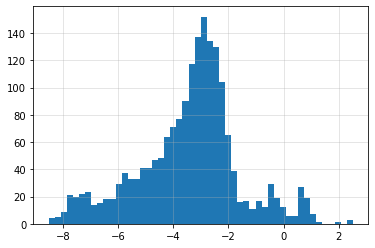

In [18]:
plt.hist(np.log(df_log_1st["kcat_mean_1st"]), bins = 50)
plt.grid(alpha = 0.4)

In [12]:
timestamps = [0,1,3, 5,10,30,60]
sample_names = ["S10", "S11", "S12", "S13", "S14", "S15", "S16"]


dict_info_2nd = dict()

for seqid in df_rcleaved.index:
    try:
        print(seqid)
        tmp, info = calc_kcat_bayes(seqid);
        log_dict = dict()
        for k,v in info.items():
            for vk, vv in v.items():
                log_dict[k+"_"+vk] = vv.numpy()[0]
        dict_info_2nd[seqid] = log_dict
    
    except:
        print(f"Error seq: {seqid}")

JOTN01000018.1/8921-9077_wild_15
[iteration 0001] loss: 11.7595
[iteration 4501] loss: 0.2795
FR903934.1/5471-5622
[iteration 0001] loss: 15.2199
[iteration 4501] loss: 0.5415
FR902178.1/2072-1922
[iteration 0001] loss: 9.3552
[iteration 4501] loss: 0.4085
GG668534.1/280157-280311
[iteration 0001] loss: 1.2329
[iteration 4501] loss: 0.5792
FR883402.1/112823-112697
[iteration 0001] loss: 5.0024
[iteration 4501] loss: 0.8112
BAUT01000048.1/6089-6247
[iteration 0001] loss: 11.5890
[iteration 4501] loss: 0.5288
LRVM01000018.1/9408-9566
[iteration 0001] loss: 3.0116
[iteration 4501] loss: 0.6259
FR891245.1/6154-6307
[iteration 0001] loss: 1.1147
[iteration 4501] loss: 0.6900
LGGA01000028.1/5750-5573
[iteration 0001] loss: 0.7968
[iteration 4501] loss: 0.2615
HF993644.1/51944-52093
[iteration 0001] loss: 2.4227
[iteration 4501] loss: 0.4618
CP013217.1/74832-75002
[iteration 0001] loss: 4.3456
[iteration 4501] loss: 0.5718
AE016830.1/2055460-2055313
[iteration 0001] loss: 13.5908
[iteration 4

[iteration 4501] loss: 0.4951
CP013476.1/1416911-1417071
[iteration 0001] loss: 2.3428
[iteration 4501] loss: 0.5869
FRCP01000007.1/100226-100389
[iteration 0001] loss: 7.1243
[iteration 4501] loss: 0.5722
LJJB01000015.1/307707-307537
[iteration 0001] loss: 9.3446
[iteration 4501] loss: 0.4795
KK036471.1/12618-12769
[iteration 0001] loss: 14.6805
[iteration 4501] loss: 0.0463
KB946293.1/815268-815121
[iteration 0001] loss: 6.7897
[iteration 4501] loss: 0.4690
CM000733.1/138271-138426
[iteration 0001] loss: 10.1313
[iteration 4501] loss: 0.5116
DS544193.1/167179-167332
[iteration 0001] loss: 12.0102
[iteration 4501] loss: 0.2824
FR884524.1/6426-6580
[iteration 0001] loss: 0.7256
[iteration 4501] loss: 0.2671
MSZX01000018.1/9414-9592
[iteration 0001] loss: 12.9943
[iteration 4501] loss: 0.1772
LIUR01000001.1/2867186-2867016
[iteration 0001] loss: 0.7415
[iteration 4501] loss: 0.2827
LGGM01000041.1/3335-3169
[iteration 0001] loss: 2.1136
[iteration 4501] loss: 0.3911
LDXQ01000045.1/6263-6

[iteration 4501] loss: 0.6159
FP565809.1/589201-589355
[iteration 0001] loss: 1.5655
[iteration 4501] loss: 0.5339
LMSP01000001.1/1108622-1108432
[iteration 0001] loss: 3.2224
[iteration 4501] loss: 0.6312
CP022437.1/118667-118492
[iteration 0001] loss: 3.3312
[iteration 4501] loss: 0.5473
AVPE01000014.1/7645-7816
[iteration 0001] loss: 4.5610
[iteration 4501] loss: 0.7644
FP929046.1/2805761-2805924
[iteration 0001] loss: 12.7763
[iteration 4501] loss: 0.2335
CP017269.1/4003558-4003727
[iteration 0001] loss: 0.8263
[iteration 4501] loss: 0.2712
JPUW01000041.1/17763-17604
[iteration 0001] loss: 8.3377
[iteration 4501] loss: 0.6380
MSDU01000050.1/2905-2737
[iteration 0001] loss: 3.9644
[iteration 4501] loss: 1.5496
CP002582.1/2249026-2249188
[iteration 0001] loss: 1.1599
[iteration 4501] loss: 0.3650
AFNU02000013.1/48765-48609
[iteration 0001] loss: 4.1691
[iteration 4501] loss: 0.5775
CYZX01000011.1/96755-96903
[iteration 0001] loss: 6.2264
[iteration 4501] loss: 0.7794
CP002160.1/44530

[iteration 4501] loss: 0.4267
FQVW01000003.1/85857-85686
[iteration 0001] loss: 9.9980
[iteration 4501] loss: 0.2921
MIEK01000034.1/17427-17280
[iteration 0001] loss: 5.1288
[iteration 4501] loss: 0.5910
FQUW01000011.1/10279-10094
[iteration 0001] loss: 2.3910
[iteration 4501] loss: 0.4267
CP001034.1/253764-253942
[iteration 0001] loss: 11.4032
[iteration 4501] loss: 0.3383
CP000922.1/156745-156916
[iteration 0001] loss: 10.5998
[iteration 4501] loss: 0.5904
FQTU01000008.1/36117-35958
[iteration 0001] loss: 0.7701
[iteration 4501] loss: 0.3039
LQYT01000002.1/38709-38883
[iteration 0001] loss: 10.6046
[iteration 4501] loss: 0.4723
BA000043.1/166978-167149
[iteration 0001] loss: 12.2472
[iteration 4501] loss: 0.1734
CP001617.1/730337-730488
[iteration 0001] loss: 13.6311
[iteration 4501] loss: 0.0636
FR899492.1/8123-7974
[iteration 0001] loss: 3.2776
[iteration 4501] loss: 0.5248
CP002273.2/453707-453857
[iteration 0001] loss: 1.0614
[iteration 4501] loss: 0.4613
LOER01000004.1/113359-11

MGBG01000022.1/18572-18740
[iteration 0001] loss: 3.2552
[iteration 4501] loss: 0.6600
ALPT02000103.1/9713-9883
[iteration 0001] loss: 3.6164
[iteration 4501] loss: 0.7085
KE150423.1/19757-19930
[iteration 0001] loss: 3.9521
[iteration 4501] loss: 0.4828
CP019699.1/195596-195760
[iteration 0001] loss: 1.8919
[iteration 4501] loss: 0.5200
FR891123.1/17403-17248
[iteration 0001] loss: 10.5593
[iteration 4501] loss: 0.2917
CP002770.1/2876436-2876252
[iteration 0001] loss: 2.0213
[iteration 4501] loss: 0.4743
CP019433.1/1566098-1565941
[iteration 0001] loss: 12.8317
[iteration 4501] loss: 0.2594
LM997412.1/809345-809488
[iteration 0001] loss: 3.9972
[iteration 4501] loss: 0.4835
MBTG01000057.1/8907-9097
[iteration 0001] loss: 3.5989
[iteration 4501] loss: 0.5828
CCDI010000005.1/16154-16323
[iteration 0001] loss: 9.5489
[iteration 4501] loss: 0.4785
CP001859.1/1063237-1063391
[iteration 0001] loss: 11.4329
[iteration 4501] loss: 0.8601
CP000860.1/387919-388097
[iteration 0001] loss: 9.6502


[iteration 4501] loss: 0.4444
JPVP01000052.1/195237-195064
[iteration 0001] loss: 11.1619
[iteration 4501] loss: 0.5016
CCXS01000001.1/3280075-3279899
[iteration 0001] loss: 1.2382
[iteration 4501] loss: 0.4128
MENB01000003.1/4420-4604
[iteration 0001] loss: 9.3595
[iteration 4501] loss: 0.5987
MNJJ01000247.1/1502-1334
[iteration 0001] loss: 5.8849
[iteration 4501] loss: 0.7131
KE159710.1/175292-175126
[iteration 0001] loss: 10.7085
[iteration 4501] loss: 0.6146
MELR01000025.1/3905-4059
[iteration 0001] loss: 10.6092
[iteration 4501] loss: 0.4326
FXWM01000001.1/342349-342514
[iteration 0001] loss: 1.3621
[iteration 4501] loss: 0.4773
JYNH01000142.1/11141-11303
[iteration 0001] loss: 0.4913
[iteration 4501] loss: 0.2475
CP001818.1/874538-874691
[iteration 0001] loss: 11.2567
[iteration 4501] loss: 0.2580
CP001098.1/161628-161798
[iteration 0001] loss: 0.5655
[iteration 4501] loss: 0.1836
MGWF01000036.1/21378-21245
[iteration 0001] loss: 8.6338
[iteration 4501] loss: 0.4689
ALJM01000006.

LAYY01000035.1/16790-16627
[iteration 0001] loss: 4.4216
[iteration 4501] loss: 0.5727
AOCG01000002.1/123032-122838
[iteration 0001] loss: 4.8281
[iteration 4501] loss: 0.7700
MRAE01000005.1/55771-55928
[iteration 0001] loss: 13.7463
[iteration 4501] loss: 0.0898
FR887202.1/2098-1929
[iteration 0001] loss: 14.3683
[iteration 4501] loss: 0.7569
CCXR01000001.1/70782-70952
[iteration 0001] loss: 4.9317
[iteration 4501] loss: 0.6657
CYYL01000003.1/67837-67672
[iteration 0001] loss: 14.7184
[iteration 4501] loss: 0.0233
JSCE01000047.1/815-971
[iteration 0001] loss: 6.9261
[iteration 4501] loss: 0.3850
LSGP01000008.1/39767-39919
[iteration 0001] loss: 3.3473
[iteration 4501] loss: 0.4790
LKEU01000012.1/60545-60697
[iteration 0001] loss: 1.0726
[iteration 4501] loss: 0.3573
NGLL01000001.1/1613397-1613254
[iteration 0001] loss: 6.6493
[iteration 4501] loss: 0.4424
FR899721.1/7096-6943
[iteration 0001] loss: 11.2309
[iteration 4501] loss: 0.0610
KI629786.1/126205-126035
[iteration 0001] loss: 1

LHOX01000017.1/101596-101739
[iteration 0001] loss: 11.1942
[iteration 4501] loss: 0.3043
AZQP01000060.1/4424-4277
[iteration 0001] loss: 2.3460
[iteration 4501] loss: 0.5802
FXBB01000034.1/2525-2368
[iteration 0001] loss: 3.1325
[iteration 4501] loss: 0.4262
AMPQ01000015.1/8680-8854
[iteration 0001] loss: 2.3024
[iteration 4501] loss: 0.4069
CP022657.1/508919-509087
[iteration 0001] loss: 8.9887
[iteration 4501] loss: 0.4904
KQ758624.1/9142-9308
[iteration 0001] loss: 0.3617
[iteration 4501] loss: 0.2139
LGFL01000045.1/9604-9765
[iteration 0001] loss: 1.4146
[iteration 4501] loss: 0.4651
MJEH01000024.1/36728-36561
[iteration 0001] loss: 0.6894
[iteration 4501] loss: 0.3230
FP929038.1/1461779-1461629
[iteration 0001] loss: 2.8294
[iteration 4501] loss: 0.5413
FUZT01000001.1/63578-63748
[iteration 0001] loss: 2.6720
[iteration 4501] loss: 0.4101
MNTA01000183.1/9379-9224
[iteration 0001] loss: 11.3434
[iteration 4501] loss: 0.3032
LMSD01000017.1/51545-51352
[iteration 0001] loss: 11.5528

[iteration 4501] loss: 0.1979
generated_seq0
[iteration 0001] loss: 1.2105
[iteration 4501] loss: 0.5000
generated_seq1
[iteration 0001] loss: 1.5322
[iteration 4501] loss: 0.4278
generated_seq2
[iteration 0001] loss: 0.6667
[iteration 4501] loss: 0.3014
generated_seq3
[iteration 0001] loss: 10.0090
[iteration 4501] loss: 0.4862
generated_seq4
[iteration 0001] loss: 1.3739
[iteration 4501] loss: 0.3816
generated_seq5
[iteration 0001] loss: 1.7961
[iteration 4501] loss: 0.4220
generated_seq6
[iteration 0001] loss: 10.2758
[iteration 4501] loss: 0.1432
generated_seq7
[iteration 0001] loss: 13.6344
[iteration 4501] loss: 0.2794
generated_seq8
[iteration 0001] loss: 2.3252
[iteration 4501] loss: 0.5043
generated_seq9
[iteration 0001] loss: 12.3717
[iteration 4501] loss: 0.6035
generated_seq10
[iteration 0001] loss: 4.5372
[iteration 4501] loss: 0.8817
generated_seq11
[iteration 0001] loss: 0.7915
[iteration 4501] loss: 0.4849
generated_seq12
[iteration 0001] loss: 5.7895
[iteration 4501] l

[iteration 4501] loss: 0.1138
generated_seq108
[iteration 0001] loss: 4.0114
[iteration 4501] loss: 0.6883
generated_seq109
[iteration 0001] loss: 0.7472
[iteration 4501] loss: 0.3817
generated_seq110
[iteration 0001] loss: 1.7975
[iteration 4501] loss: 0.3891
generated_seq111
[iteration 0001] loss: 11.8836
[iteration 4501] loss: 0.1795
generated_seq112
[iteration 0001] loss: 0.5650
[iteration 4501] loss: 0.3002
generated_seq113
[iteration 0001] loss: 6.2836
[iteration 4501] loss: 0.6375
generated_seq114
[iteration 0001] loss: 0.7943
[iteration 4501] loss: 0.2845
generated_seq115
[iteration 0001] loss: 4.4550
[iteration 4501] loss: 0.7784
generated_seq116
[iteration 0001] loss: 1.2144
[iteration 4501] loss: 0.4024
generated_seq117
[iteration 0001] loss: 6.9026
[iteration 4501] loss: 0.5631
generated_seq118
[iteration 0001] loss: 2.3807
[iteration 4501] loss: 0.4807
generated_seq119
[iteration 0001] loss: 9.1356
[iteration 4501] loss: 0.9101
generated_seq120
[iteration 0001] loss: 4.858

generated_seq214
[iteration 0001] loss: 5.4664
[iteration 4501] loss: 0.4707
generated_seq215
[iteration 0001] loss: 6.3538
[iteration 4501] loss: 0.8591
generated_seq216
[iteration 0001] loss: 12.2057
[iteration 4501] loss: 0.3327
generated_seq217
[iteration 0001] loss: 0.7067
[iteration 4501] loss: 0.3169
generated_seq218
[iteration 0001] loss: 0.2933
[iteration 4501] loss: 0.1560
generated_seq219
[iteration 0001] loss: 1.4636
[iteration 4501] loss: 0.4591
generated_seq220
[iteration 0001] loss: 2.5842
[iteration 4501] loss: 0.6587
generated_seq221
[iteration 0001] loss: 0.7816
[iteration 4501] loss: 0.4014
generated_seq222
[iteration 0001] loss: 12.0259
[iteration 4501] loss: 0.3278
generated_seq223
[iteration 0001] loss: 11.5004
[iteration 4501] loss: 0.4843
generated_seq224
[iteration 0001] loss: 4.8068
[iteration 4501] loss: 0.7368
generated_seq225
[iteration 0001] loss: 4.6608
[iteration 4501] loss: 0.6252
generated_seq226
[iteration 0001] loss: 0.9589
[iteration 4501] loss: 0.2

[iteration 4501] loss: 0.2904
generated_seq321
[iteration 0001] loss: 2.4392
[iteration 4501] loss: 0.4370
generated_seq322
[iteration 0001] loss: 5.7956
[iteration 4501] loss: 0.9616
generated_seq323
[iteration 0001] loss: 2.6032
[iteration 4501] loss: 0.5272
generated_seq324
[iteration 0001] loss: 2.3785
[iteration 4501] loss: 0.5374
generated_seq325
[iteration 0001] loss: 0.5411
[iteration 4501] loss: 0.2373
generated_seq326
[iteration 0001] loss: 9.9207
[iteration 4501] loss: 0.5277
generated_seq327
[iteration 0001] loss: 1.8971
[iteration 4501] loss: 0.3802
generated_seq328
[iteration 0001] loss: 8.3034
[iteration 4501] loss: 0.8599
generated_seq329
[iteration 0001] loss: 2.0707
[iteration 4501] loss: 0.5327
generated_seq330
[iteration 0001] loss: 1.1937
[iteration 4501] loss: 0.3632
generated_seq331
[iteration 0001] loss: 0.9977
[iteration 4501] loss: 0.3245
generated_seq332
[iteration 0001] loss: 1.2476
[iteration 4501] loss: 0.4445
generated_seq333
[iteration 0001] loss: 12.847

generated_seq427
[iteration 0001] loss: 2.6859
[iteration 4501] loss: 0.4566
generated_seq428
[iteration 0001] loss: 8.5413
[iteration 4501] loss: 0.7251
generated_seq429
[iteration 0001] loss: 0.7998
[iteration 4501] loss: 0.2614
generated_seq430
[iteration 0001] loss: 3.0048
[iteration 4501] loss: 0.7839
generated_seq431
[iteration 0001] loss: 10.3530
[iteration 4501] loss: 0.3442
generated_seq432
[iteration 0001] loss: 1.4228
[iteration 4501] loss: 0.3648
generated_seq433
[iteration 0001] loss: 0.9861
[iteration 4501] loss: 0.4022
generated_seq434
[iteration 0001] loss: 11.5754
[iteration 4501] loss: 0.4006
generated_seq435
[iteration 0001] loss: 11.1611
[iteration 4501] loss: 0.6172
generated_seq436
[iteration 0001] loss: 7.0951
[iteration 4501] loss: 0.8155
generated_seq437
[iteration 0001] loss: 1.2371
[iteration 4501] loss: 0.4919
generated_seq438
[iteration 0001] loss: 0.4483
[iteration 4501] loss: 0.1472
generated_seq439
[iteration 0001] loss: 1.7812
[iteration 4501] loss: 0.3

[iteration 4501] loss: 0.8501
generated_seq534
[iteration 0001] loss: 11.3903
[iteration 4501] loss: 0.4199
generated_seq535
[iteration 0001] loss: 10.5569
[iteration 4501] loss: 0.3333
generated_seq536
[iteration 0001] loss: 0.6715
[iteration 4501] loss: 0.3206
generated_seq537
[iteration 0001] loss: 0.5866
[iteration 4501] loss: 0.2142
generated_seq538
[iteration 0001] loss: 0.9876
[iteration 4501] loss: 0.4370
generated_seq539
[iteration 0001] loss: 1.7254
[iteration 4501] loss: 0.4566
generated_seq540
[iteration 0001] loss: 0.7581
[iteration 4501] loss: 0.3434
generated_seq541
[iteration 0001] loss: 0.8787
[iteration 4501] loss: 0.3626
generated_seq542
[iteration 0001] loss: 0.8064
[iteration 4501] loss: 0.3948
generated_seq543
[iteration 0001] loss: 6.5387
[iteration 4501] loss: 0.5514
generated_seq544
[iteration 0001] loss: 2.2263
[iteration 4501] loss: 0.4366
generated_seq545
[iteration 0001] loss: 0.3518
[iteration 4501] loss: 0.2428
generated_seq546
[iteration 0001] loss: 1.72

generated_seq640
[iteration 0001] loss: 0.2077
[iteration 4501] loss: 0.0857
generated_seq641
[iteration 0001] loss: 1.6282
[iteration 4501] loss: 0.4648
generated_seq642
[iteration 0001] loss: 7.1253
[iteration 4501] loss: 0.5658
generated_seq643
[iteration 0001] loss: 1.6686
[iteration 4501] loss: 0.4594
generated_seq644
[iteration 0001] loss: 6.4283
[iteration 4501] loss: 0.6292
generated_seq645
[iteration 0001] loss: 0.4051
[iteration 4501] loss: 0.2044
generated_seq646
[iteration 0001] loss: 0.3308
[iteration 4501] loss: 0.1347
generated_seq647
[iteration 0001] loss: 1.7819
[iteration 4501] loss: 0.5330
generated_seq648
[iteration 0001] loss: 0.7022
[iteration 4501] loss: 0.3849
generated_seq649
[iteration 0001] loss: 9.8036
[iteration 4501] loss: 0.6075
generated_seq650
[iteration 0001] loss: 13.9741
[iteration 4501] loss: 1.0929
generated_seq651
[iteration 0001] loss: 13.5271
[iteration 4501] loss: 0.0630
generated_seq652
[iteration 0001] loss: 2.1890
[iteration 4501] loss: 0.58

[iteration 4501] loss: 0.4789
generated_seq747
[iteration 0001] loss: 12.5269
[iteration 4501] loss: 0.5218
generated_seq748
[iteration 0001] loss: 3.7404
[iteration 4501] loss: 0.6713
generated_seq749
[iteration 0001] loss: 5.0834
[iteration 4501] loss: 0.5732
generated_seq750
[iteration 0001] loss: 10.7375
[iteration 4501] loss: 0.1486
generated_seq751
[iteration 0001] loss: 9.2205
[iteration 4501] loss: 0.3804
generated_seq752
[iteration 0001] loss: 0.6420
[iteration 4501] loss: 0.3335
generated_seq753
[iteration 0001] loss: 11.0988
[iteration 4501] loss: 0.7605
generated_seq754
[iteration 0001] loss: 3.0228
[iteration 4501] loss: 0.8422
generated_seq755
[iteration 0001] loss: 9.9751
[iteration 4501] loss: 0.6615
generated_seq756
[iteration 0001] loss: 3.9632
[iteration 4501] loss: 0.5228
generated_seq757
[iteration 0001] loss: 0.8155
[iteration 4501] loss: 0.3032
generated_seq758
[iteration 0001] loss: 1.7783
[iteration 4501] loss: 0.3914
generated_seq759
[iteration 0001] loss: 1.0

[iteration 4501] loss: 0.1639
generated_seq854
[iteration 0001] loss: 10.3940
[iteration 4501] loss: 0.6014
generated_seq855
[iteration 0001] loss: 0.1754
[iteration 4501] loss: 0.1196
generated_seq856
[iteration 0001] loss: 13.5155
[iteration 4501] loss: 0.6919
generated_seq857
[iteration 0001] loss: 7.6410
[iteration 4501] loss: 0.7869
generated_seq858
[iteration 0001] loss: 14.9614
[iteration 4501] loss: 0.3832
generated_seq859
[iteration 0001] loss: 0.5464
[iteration 4501] loss: 0.2376
generated_seq860
[iteration 0001] loss: 8.8585
[iteration 4501] loss: 0.8082
generated_seq861
[iteration 0001] loss: 1.1116
[iteration 4501] loss: 0.2893
generated_seq862
[iteration 0001] loss: 3.7177
[iteration 4501] loss: 0.6001
generated_seq863
[iteration 0001] loss: 3.6745
[iteration 4501] loss: 0.4790
generated_seq864
[iteration 0001] loss: 1.8298
[iteration 4501] loss: 0.4112
generated_seq865
[iteration 0001] loss: 1.4396
[iteration 4501] loss: 0.3774
generated_seq866
[iteration 0001] loss: 5.9

generated_seq960
[iteration 0001] loss: 12.6966
[iteration 4501] loss: 0.4529
generated_seq961
[iteration 0001] loss: 1.2713
[iteration 4501] loss: 0.3834
generated_seq962
[iteration 0001] loss: 2.1018
[iteration 4501] loss: 0.9159
generated_seq963
[iteration 0001] loss: 11.8802
[iteration 4501] loss: 0.4237
generated_seq964
[iteration 0001] loss: 10.2710
[iteration 4501] loss: 0.5566
generated_seq965
[iteration 0001] loss: 1.3381
[iteration 4501] loss: 0.3563
generated_seq966
[iteration 0001] loss: 3.1397
[iteration 4501] loss: 0.5872
generated_seq967
[iteration 0001] loss: 0.4062
[iteration 4501] loss: 0.2063
generated_seq968
[iteration 0001] loss: 2.8488
[iteration 4501] loss: 0.5716
generated_seq969
[iteration 0001] loss: 0.9578
[iteration 4501] loss: 0.3375
generated_seq970
[iteration 0001] loss: 0.2932
[iteration 4501] loss: 0.1660
generated_seq971
[iteration 0001] loss: 3.7635
[iteration 4501] loss: 0.7007
generated_seq972
[iteration 0001] loss: 0.8831
[iteration 4501] loss: 0.4

[iteration 4501] loss: 0.0333
seqid-12656_logkcat--8.4654_tau-4747.6618_binid-5
[iteration 0001] loss: 13.6318
[iteration 4501] loss: 0.0412
seqid-6377_logkcat--8.8488_tau-6965.7771_binid-5
[iteration 0001] loss: 12.3513
[iteration 4501] loss: 0.0357
seqid-3168_logkcat--8.7793_tau-6498.0214_binid-5
[iteration 0001] loss: 12.4295
[iteration 4501] loss: 0.0589
seqid-10586_logkcat--8.7517_tau-6321.5521_binid-5
[iteration 0001] loss: 12.4534
[iteration 4501] loss: 0.0735
seqid-22699_logkcat--7.0359_tau-1136.7176_binid-6
[iteration 0001] loss: 14.2641
[iteration 4501] loss: 0.1427
seqid-755_logkcat--7.0512_tau-1154.2306_binid-6
[iteration 0001] loss: 12.7963
[iteration 4501] loss: 0.0820
seqid-5749_logkcat--7.5105_tau-1827.1815_binid-6
[iteration 0001] loss: 12.8073
[iteration 4501] loss: 0.1229
seqid-48403_logkcat--7.1724_tau-1302.9486_binid-6
[iteration 0001] loss: 12.3322
[iteration 4501] loss: 0.0453
seqid-36712_logkcat--7.2098_tau-1352.5888_binid-6
[iteration 0001] loss: 14.5018
[itera

In [13]:
info

{'kcat': {'mean': tensor([0.0083]),
  'std': tensor([0.0006]),
  '5%': tensor([0.0074]),
  '95%': tensor([0.0094])},
 'tbase': {'mean': tensor([1.0400]),
  'std': tensor([0.4708]),
  '5%': tensor([0.4678]),
  '95%': tensor([1.9099])},
 '_RETURN': {'mean': tensor([0.0086, 0.0086, 0.0086,  ..., 0.3976, 0.3976, 0.3976]),
  'std': tensor([0.0040, 0.0040, 0.0040,  ..., 0.0218, 0.0218, 0.0218]),
  '5%': tensor([0.0038, 0.0038, 0.0038,  ..., 0.3621, 0.3621, 0.3621]),
  '95%': tensor([0.0158, 0.0158, 0.0158,  ..., 0.4352, 0.4352, 0.4352])}}

In [14]:
df_log_2nd = pd.DataFrame(dict_info_2nd).T
colnames = [c+"_2nd" for c in df_log_2nd.columns]
df_log_2nd.columns = colnames
# df_log_2nd.to_csv("../../outputs/220822/kinetics_param_dup2.csv")
df_log_2nd

,kcat_mean_2nd,kcat_std_2nd,kcat_5%_2nd,kcat_95%_2nd,tbase_mean_2nd,tbase_std_2nd,tbase_5%_2nd,tbase_95%_2nd,_RETURN_mean_2nd,_RETURN_std_2nd,_RETURN_5%_2nd,_RETURN_95%_2nd
JOTN01000018.1/8921-9077_wild_15,0.007641,0.000448,0.006939,0.008409,0.491396,0.375525,0.118932,1.121669,0.003747,0.002882,0.000887,0.008675
FR903934.1/5471-5622,0.003792,0.005180,0.000406,0.012615,1.060913,1.451352,0.115017,3.349074,0.003982,0.008155,0.000131,0.017741
FR902178.1/2072-1922,0.032343,0.002654,0.028047,0.036809,0.307869,0.287580,0.058704,0.858193,0.009865,0.009186,0.001893,0.027658
GG668534.1/280157-280311,0.571145,0.009068,0.556629,0.587014,0.634912,0.033543,0.581578,0.694245,0.304014,0.013882,0.281765,0.327381
FR883402.1/112823-112697,0.016731,0.001169,0.014911,0.018799,25.314756,1.882315,22.233913,28.598452,0.344662,0.028212,0.299248,0.393715
...,...,...,...,...,...,...,...,...,...,...,...,...
seqid-16228_logkcat--3.0055_tau-20.1958_binid-10,0.012300,0.000686,0.011152,0.013425,0.953782,0.433380,0.433243,1.766319,0.011645,0.005280,0.005305,0.021712
seqid-13265_logkcat--3.0558_tau-21.2392_binid-10,0.015015,0.000855,0.013632,0.016457,0.312462,0.275469,0.065371,0.788838,0.004665,0.004055,0.000977,0.012389
seqid-17578_logkcat--2.985_tau-19.7873_binid-10,0.008296,0.000596,0.007317,0.009306,0.870605,0.456934,0.317244,1.766101,0.007180,0.003777,0.002661,0.014601
seqid-5069_logkcat--2.1661_tau-8.724_binid-10,0.027824,0.001132,0.026008,0.029816,1.396943,0.349360,0.917600,2.060268,0.038090,0.009482,0.024775,0.056125


# kcat analysis

In [16]:
df_log_all = pd.merge(df_log_1st, df_log_2nd, left_index=True, right_index=True)
df_log_all

,kcat_mean_1st,kcat_std_1st,kcat_5%_1st,kcat_95%_1st,tbase_mean_1st,tbase_std_1st,tbase_5%_1st,tbase_95%_1st,_RETURN_mean_1st,_RETURN_std_1st,...,kcat_5%_2nd,kcat_95%_2nd,tbase_mean_2nd,tbase_std_2nd,tbase_5%_2nd,tbase_95%_2nd,_RETURN_mean_2nd,_RETURN_std_2nd,_RETURN_5%_2nd,_RETURN_95%_2nd
JOTN01000018.1/8921-9077_wild_15,0.005023,0.000205,0.004684,0.005355,7.562647,0.546541,6.666773,8.444406,0.037272,0.003063,...,0.006939,0.008409,0.491396,0.375525,0.118932,1.121669,0.003747,0.002882,0.000887,0.008675
FR903934.1/5471-5622,0.008449,0.006751,0.002068,0.020488,1.089378,1.096704,0.177480,3.323710,0.008799,0.012180,...,0.000406,0.012615,1.060913,1.451352,0.115017,3.349074,0.003982,0.008155,0.000131,0.017741
FR902178.1/2072-1922,0.028319,0.001703,0.025677,0.031157,1.320219,0.341021,0.847762,1.948444,0.036637,0.009474,...,0.028047,0.036809,0.307869,0.287580,0.058704,0.858193,0.009865,0.009186,0.001893,0.027658
GG668534.1/280157-280311,0.029769,0.000314,0.029253,0.030296,70.754738,0.784513,69.474159,72.024315,0.878248,0.003932,...,0.556629,0.587014,0.634912,0.033543,0.581578,0.694245,0.304014,0.013882,0.281765,0.327381
FR883402.1/112823-112697,0.019294,0.001035,0.017619,0.021101,28.927801,1.800853,26.048470,32.009842,0.427114,0.025864,...,0.014911,0.018799,25.314756,1.882315,22.233913,28.598452,0.344662,0.028212,0.299248,0.393715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
seqid-16228_logkcat--3.0055_tau-20.1958_binid-10,0.005916,0.000313,0.005406,0.006431,3.856278,0.490517,3.112801,4.704177,0.022554,0.003090,...,0.011152,0.013425,0.953782,0.433380,0.433243,1.766319,0.011645,0.005280,0.005305,0.021712
seqid-13265_logkcat--3.0558_tau-21.2392_binid-10,0.009668,0.000456,0.008942,0.010440,3.051726,0.322954,2.525671,3.598073,0.029069,0.003337,...,0.013632,0.016457,0.312462,0.275469,0.065371,0.788838,0.004665,0.004055,0.000977,0.012389
seqid-17578_logkcat--2.985_tau-19.7873_binid-10,0.005415,0.000296,0.004954,0.005910,3.337976,0.466875,2.643861,4.223836,0.017913,0.002681,...,0.007317,0.009306,0.870605,0.456934,0.317244,1.766101,0.007180,0.003777,0.002661,0.014601
seqid-5069_logkcat--2.1661_tau-8.724_binid-10,0.014408,0.000464,0.013628,0.015169,2.606856,0.254500,2.209277,3.036558,0.036857,0.003733,...,0.026008,0.029816,1.396943,0.349360,0.917600,2.060268,0.038090,0.009482,0.024775,0.056125


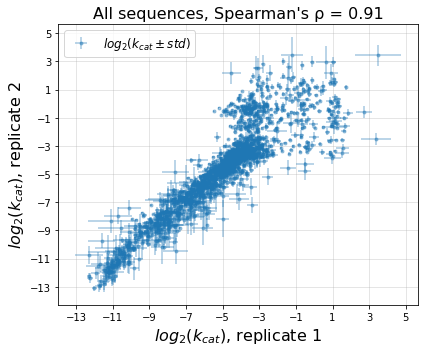

In [157]:
# plt.scatter(
#     np.log2(df_log_all["kcat_mean_1st"]),
#     np.log2(df_log_all["kcat_mean_2nd"]),
#     c = df_depth.loc[df_log_all.index].min(axis = 1),
#     alpha = 0.2
# )

plt.figure(figsize = (6, 5))

corr, p = spearmanr(
    df_log_all["kcat_mean_1st"],
    df_log_all["kcat_mean_2nd"])

plt.errorbar(
    x = np.log2(df_log_all["kcat_mean_1st"]),
    y = np.log2(df_log_all["kcat_mean_2nd"]),
    xerr = np.log2(df_log_all["kcat_mean_1st"] + df_log_all["kcat_std_1st"]) - np.log2(df_log_all["kcat_mean_1st"]),
    yerr = np.log2(df_log_all["kcat_mean_2nd"] + df_log_all["kcat_std_2nd"]) - np.log2(df_log_all["kcat_mean_2nd"]),
    # c = df_depth.loc[df_log_all.index].min(axis = 1),
    alpha = 0.4,
    fmt = ".",
    label = "$log_2({k_{cat} \pm std})$"
)



plt.grid(alpha = 0.4)
plt.legend(fontsize = 12, loc = "upper left")
plt.xticks(range(-13, 6, 2));
plt.yticks(range(-13, 6, 2));
plt.title(f"All sequences, Spearman's ρ = {round(corr, 3)}", fontsize = 16)
plt.xlabel("$log_2(k_{cat})$, replicate 1", fontsize = 16)
plt.ylabel("$log_2(k_{cat})$, replicate 2", fontsize = 16)
plt.tight_layout()
plt.savefig("../../outputs/220822/reproducibility_all_kcat_SVI.png", dpi = 300)
plt.savefig("../../outputs/220822/reproducibility_all_kcat_SVI.pdf", dpi = 300)


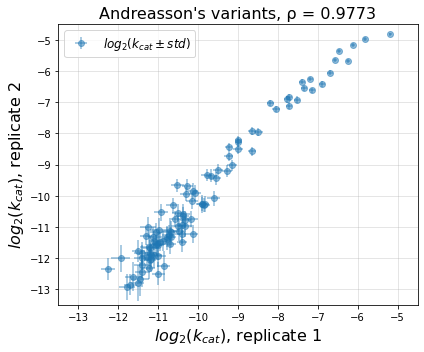

In [89]:

plt.figure(figsize = (6, 5))
corr, p = pearsonr(
    df_log_andreasson["kcat_mean_1st"],
    df_log_andreasson["kcat_mean_2nd"])
plt.errorbar(
    x = np.log2(df_log_andreasson["kcat_mean_1st"]),
    y = np.log2(df_log_andreasson["kcat_mean_2nd"]),
    xerr = np.log2(df_log_andreasson["kcat_mean_1st"] + df_log_andreasson["kcat_std_1st"]) - np.log2(df_log_andreasson["kcat_mean_1st"]),
    yerr = np.log2(df_log_andreasson["kcat_mean_2nd"] + df_log_andreasson["kcat_std_2nd"]) - np.log2(df_log_andreasson["kcat_mean_2nd"]),
    fmt = "o",  alpha = 0.5,
    label = "$log_2(k_{cat}\pm std)$"
)
plt.legend(fontsize = 12)
plt.grid(alpha = 0.4)
plt.xticks(range(-13, -4));
plt.yticks(range(-13, -4));
plt.xlim(-13.5, -4.5)
plt.ylim(-13.5, -4.5)
plt.title(f"Andreasson's variants, ρ = {round(corr, 4)}", fontsize = 16)
plt.xlabel("$log_2(k_{cat})$, replicate 1", fontsize = 16)
plt.ylabel("$log_2(k_{cat})$, replicate 2", fontsize = 16)
plt.tight_layout()
plt.savefig("../../outputs/220822/reproducibility_andreasson_kcat_SVI.png", dpi = 300)
plt.savefig("../../outputs/220822/reproducibility_andreasson_kcat_SVI.pdf", dpi = 300)



In [334]:
csv_ref = "../../reference/cleavesite_rna_library_notrunc_cyk.csv"

samfiles = [f"../../outputs/220822/bwa/{i}_S{i}_L001_merged.assembled.sam" for i in range(1, 19)]

dict_sam2pos = dict()
for samfile in  [f"../../outputs/220822/bwa/{i}_S{i}_L001_merged.assembled.bam" for i in range(1, 19)]:
    fname, _ = os.path.splitext(samfile)
    id_sample = fname.split("_")[1]
    pos, readlen = get_cleaved_5site(samfile)
    dict_sam2pos[samfile] = pos


[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/bwa/1_S1_L001_merged.assembled.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/bwa/2_S2_L001_merged.assembled.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/bwa/3_S3_L001_merged.assembled.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/bwa/4_S4_L001_merged.assembled.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/bwa/5_S5_L001_merged.assembled.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/bwa/6_S6_L001_merged.assembled.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/bwa/7_S7_L001_merged.assembled.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/bwa/8_S8_L001_merged.assembled.bam'
[E::idx_find_and_load] Could not retrieve index file for '../../outputs/220822/b

# synthetic v.s. natural

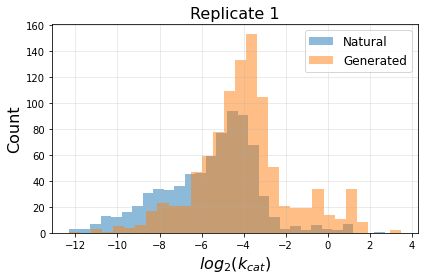

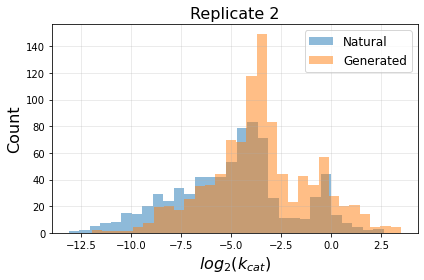

In [155]:
natural = df_log_all.filter(like = "/", axis = 0)
synthetic = df_log_all.filter(like = "generated", axis = 0)

plt.hist(np.log2(natural["kcat_mean_1st"]), bins = 30, alpha = 0.5, label = "Natural")
plt.hist(np.log2(synthetic["kcat_mean_1st"]), bins = 30, alpha = 0.5, label = "Generated")
plt.legend(fontsize = 12)
plt.xlabel("$log_2(k_{cat})$", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.grid(alpha = 0.3)
plt.title(f"Replicate 1", fontsize = 16)
plt.tight_layout()

plt.savefig("../../outputs/220822/hist_natural_vs_generated_rep1_kcat_SVI.png", dpi = 300)
plt.savefig("../../outputs/220822/hist_natural_vs_generated_rep1_kcat_SVI.pdf", dpi = 300)
plt.show()


plt.hist(np.log2(natural["kcat_mean_2nd"]), bins = 30, alpha = 0.5, label = "Natural")
plt.hist(np.log2(synthetic["kcat_mean_2nd"]), bins = 30, alpha = 0.5, label = "Generated")
plt.legend(fontsize = 12)
plt.xlabel("$log_2(k_{cat})$", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.grid(alpha = 0.3)
plt.title(f"Replicate 2", fontsize = 16)
plt.tight_layout()

plt.savefig("../../outputs/220822/hist_natural_vs_generated_rep2_kcat_SVI.png", dpi = 300)
plt.savefig("../../outputs/220822/hist_natural_vs_generated_rep2_kcat_SVI.pdf", dpi = 300)
plt.show()
